In [ ]:
# Pablo Esteban Reyes Herrera - A01643307
f = open("mlb_teams_2012.csv", "rt")
tabla = []
for l in f.readlines():
  line = []
  line = l.split(',')
  line[-1] = line[-1].rstrip("\n")
  tabla.append(line)
f.close()
print(tabla)
f.close()

[['"Team"', ' "Payroll (millions)"', ' "Wins"'], ['"Nationals"', '     81.34', ' 98'], ['"Reds"', '          82.20', ' 97'], ['"Yankees"', '      197.96', ' 95'], ['"Giants"', '       117.62', ' 94'], ['"Braves"', '        83.31', ' 94'], ['"Athletics"', '     55.37', ' 94'], ['"Rangers"', '      120.51', ' 93'], ['"Orioles"', '       81.43', ' 93'], ['"Rays"', '          64.17', ' 90'], ['"Angels"', '       154.49', ' 89'], ['"Tigers"', '       132.30', ' 88'], ['"Cardinals"', '    110.30', ' 88'], ['"Dodgers"', '       95.14', ' 86'], ['"White Sox"', '     96.92', ' 85'], ['"Brewers"', '       97.65', ' 83'], ['"Phillies"', '     174.54', ' 81'], ['"Diamondbacks"', '  74.28', ' 81'], ['"Pirates"', '       63.43', ' 79'], ['"Padres"', '        55.24', ' 76'], ['"Mariners"', '      81.97', ' 75'], ['"Mets"', '          93.35', ' 74'], ['"Blue Jays"', '     75.48', ' 73'], ['"Royals"', '        60.91', ' 72'], ['"Marlins"', '      118.07', ' 69'], ['"Red Sox"', '      173.18', ' 69'], [

In [ ]:
for line in tabla:
  print(line)

['"Team"', ' "Payroll (millions)"', ' "Wins"']
['"Nationals"', '     81.34', ' 98']
['"Reds"', '          82.20', ' 97']
['"Yankees"', '      197.96', ' 95']
['"Giants"', '       117.62', ' 94']
['"Braves"', '        83.31', ' 94']
['"Athletics"', '     55.37', ' 94']
['"Rangers"', '      120.51', ' 93']
['"Orioles"', '       81.43', ' 93']
['"Rays"', '          64.17', ' 90']
['"Angels"', '       154.49', ' 89']
['"Tigers"', '       132.30', ' 88']
['"Cardinals"', '    110.30', ' 88']
['"Dodgers"', '       95.14', ' 86']
['"White Sox"', '     96.92', ' 85']
['"Brewers"', '       97.65', ' 83']
['"Phillies"', '     174.54', ' 81']
['"Diamondbacks"', '  74.28', ' 81']
['"Pirates"', '       63.43', ' 79']
['"Padres"', '        55.24', ' 76']
['"Mariners"', '      81.97', ' 75']
['"Mets"', '          93.35', ' 74']
['"Blue Jays"', '     75.48', ' 73']
['"Royals"', '        60.91', ' 72']
['"Marlins"', '      118.07', ' 69']
['"Red Sox"', '      173.18', ' 69']
['"Indians"', '       78.43'

In [87]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from statistics import mode
from sklearn.cluster import KMeans
df = pd.read_csv("mlb_teams_2012.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   30 non-null     object 
 1    "Payroll (millions)"  30 non-null     float64
 2    "Wins"                30 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes
None


In [ ]:
df.columns
df.head()
tail = df.tail()
tail.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 25 to 29
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   5 non-null      object 
 1    "Payroll (millions)"  5 non-null      float64
 2    "Wins"                5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 252.0+ bytes


,"""Payroll (millions)""","""Wins"""
count,30.000000,30.000000
mean,98.019000,81.000000
std,36.831074,11.933725
min,55.240000,55.000000
25%,76.125000,72.250000
50%,85.750000,82.000000
75%,115.790000,92.250000
max,197.960000,98.000000


In [82]:
#Valor Maximo Wins
max_wins = df['Wins'].max()

print("Valor Maximo de Wins:", max_wins)


Valor Maximo de Wins: 98


In [86]:
#Valor Maximo Payroll
max_payroll = df['Payroll_(millions)'].max()
print("Valor Maximo de Payroll:", max_payroll)

Maximum Payroll (millions): 197.96


In [ ]:
#Media recortada
col_index = 1  # Asumiendo que 'Payroll (millions)' es la segunda columna
valores_sorteados = sorted(df.iloc[:, col_index])
porcentaje_recorte = 0.1
recorte_count = int(len(valores_sorteados) * porcentaje_recorte)
valores_recortados = valores_sorteados[recorte_count:-recorte_count]

media_recortada = sum(valores_recortados) / len(valores_recortados)

print(f"La media recortada de Payroll (millions) {col_index} es: {media_recortada}")

La media recortada de Payroll (millions) 1 es: 92.65125


In [ ]:

col_index = 2  # Asumiendo que 'Wins' es la segunda columna
valores_sorteados = sorted(df.iloc[:, col_index])
porcentaje_recorte = 0.1
recorte_count = int(len(valores_sorteados) * porcentaje_recorte)
valores_recortados = valores_sorteados[recorte_count:-recorte_count]

# Calculate the trimmed mean
media_recortada = sum(valores_recortados) / len(valores_recortados)

print(f"TLa media recortada de Wins es: {media_recortada}")


TLa media recortada de Wins es: 81.66666666666667


In [ ]:
#Media ponderada
pesos_iguales = [1] * len(df)
indice_columna_victorias = 2
media_ponderada_victorias = sum(df.iloc[:, indice_columna_victorias] * pesos_iguales) / sum(pesos_iguales)
indice_columna_nomina = 1
media_ponderada_nomina = sum(df.iloc[:, indice_columna_nomina] * pesos_iguales) / sum(pesos_iguales)
print(f"La media ponderada de 'Wins' es: {media_ponderada_victorias}")
print(f"La media ponderada de 'Payroll (millions)' es: {media_ponderada_nomina}")

La media ponderada de 'Wins' es: 81.0
La media ponderada de 'Payroll (millions)' es: 98.019


In [ ]:
# Moda
df.columns = df.columns.str.strip('_"')
df.columns = df.columns.str.strip('"')
mode_wins = df['Wins'].mode()
print("La moda de 'Wins' is:", mode_wins.iloc[0])

La moda de 'Wins' is: 94


In [ ]:
# Mediana
median_wins = df['Wins'].median()

print("La medianda de 'Wins' is:", median_wins)


La medianda de 'Wins' is: 82.0


In [ ]:
# Desviación estandar
std_dev_wins = df['Wins'].std()

# Varianza
variance_wins = df['Wins'].var()

print("Desviación Estándar:", std_dev_wins)
print("Varianza:", variance_wins)

Desviación Estándar: 11.933725030494388
Varianza: 142.41379310344828


In [80]:
#Cuartiles
wins_quartiles = df['Wins'].quantile([0.25, 0.5, 0.75])
print("(Q1):", wins_quartiles[0.25])
print("(Q2):", wins_quartiles[0.5])
print("(Q3):", wins_quartiles[0.75])


(Q1): 72.25
(Q2): 82.0
(Q3): 92.25


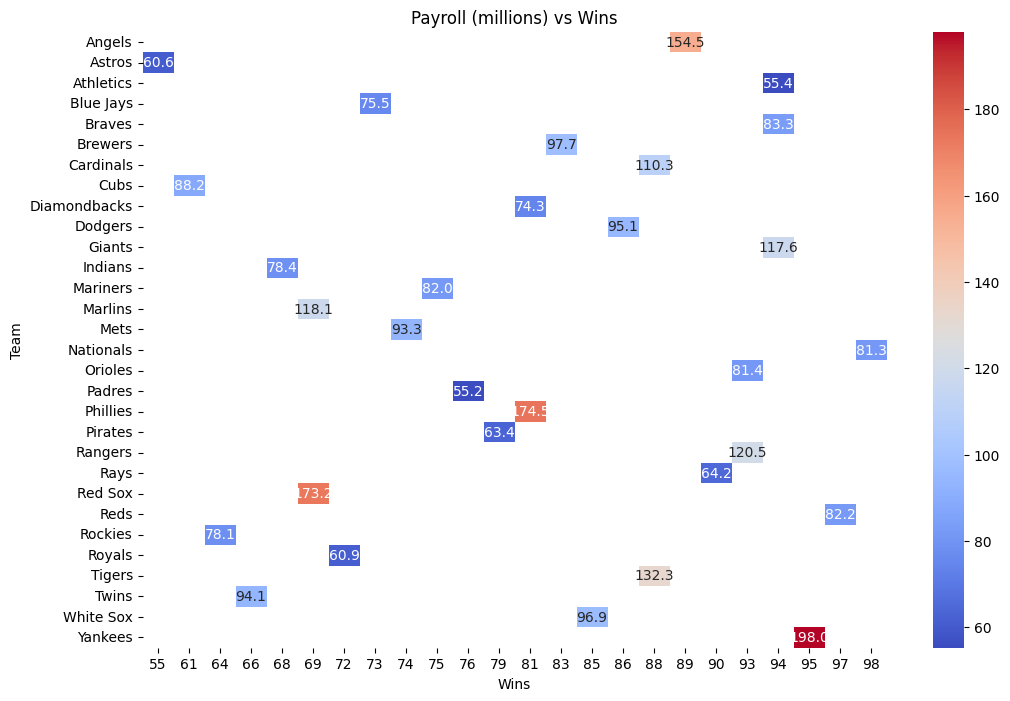

In [91]:
#Heat Map
data = {
    "Team": ["Nationals", "Reds", "Yankees", "Giants", "Braves", "Athletics", "Rangers", "Orioles",
             "Rays", "Angels", "Tigers", "Cardinals", "Dodgers", "White Sox", "Brewers", "Phillies",
             "Diamondbacks", "Pirates", "Padres", "Mariners", "Mets", "Blue Jays", "Royals", "Marlins",
             "Red Sox", "Indians", "Twins", "Rockies", "Cubs", "Astros"],
    "Payroll (millions)": [81.34, 82.20, 197.96, 117.62, 83.31, 55.37, 120.51, 81.43, 64.17, 154.49, 132.30,
                           110.30, 95.14, 96.92, 97.65, 174.54, 74.28, 63.43, 55.24, 81.97, 93.35, 75.48,
                           60.91, 118.07, 173.18, 78.43, 94.08, 78.06, 88.19, 60.65],
    "Wins": [98, 97, 95, 94, 94, 94, 93, 93, 90, 89, 88, 88, 86, 85, 83, 81, 81, 79, 76, 75, 74, 73,
             72, 69, 69, 68, 66, 64, 61, 55]
}

df = pd.DataFrame(data)

# Create a pivot table for 'Team' vs 'Wins'
pivot_table = df.pivot(index='Team', columns='Wins', values='Payroll (millions)')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Payroll (millions) vs Wins")
plt.show()

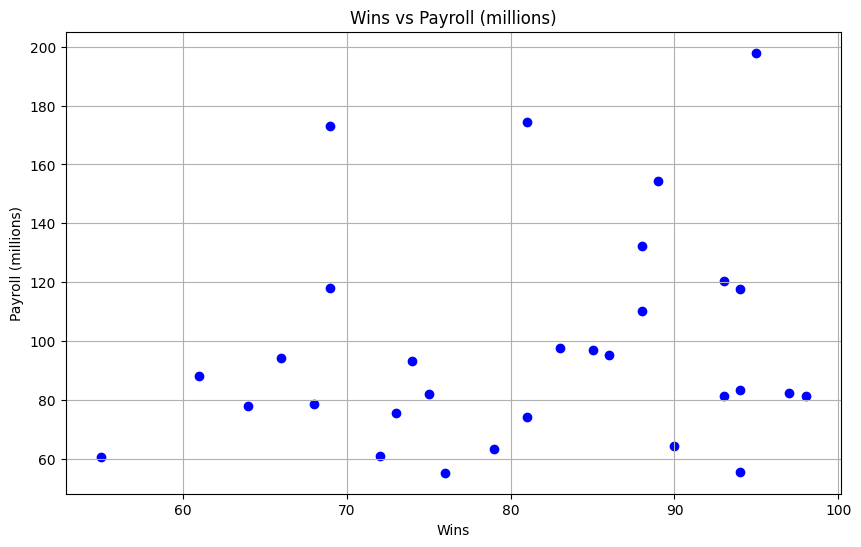

In [96]:
#Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Wins'], df['Payroll (millions)'], color='blue')
plt.title('Wins vs Payroll (millions)')
plt.xlabel('Wins')
plt.ylabel('Payroll (millions)')
plt.grid(True)
plt.show()

In [97]:
print(df.describe())

       Payroll (millions)       Wins
count           30.000000  30.000000
mean            98.019000  81.000000
std             36.831074  11.933725
min             55.240000  55.000000
25%             76.125000  72.250000
50%             85.750000  82.000000
75%            115.790000  92.250000
max            197.960000  98.000000


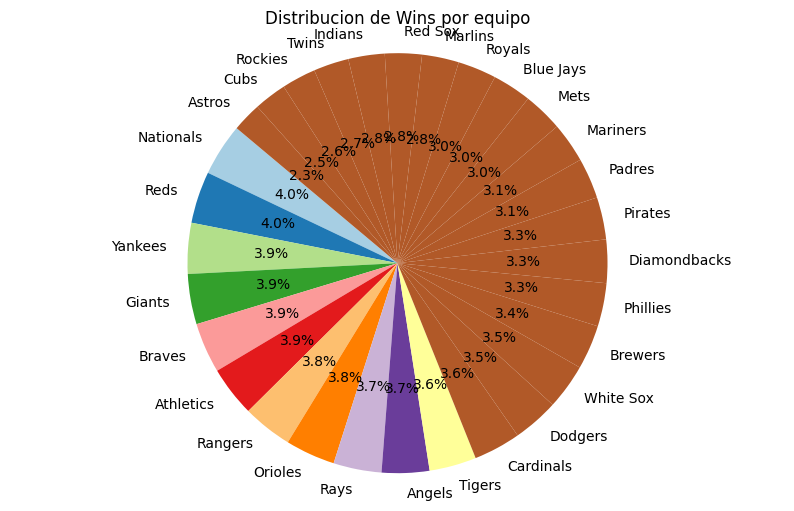

In [100]:
# Pie chart
df.columns = df.columns.str.strip('_"')
df.columns = df.columns.str.strip('"')

total_wins = df['Wins'].sum()


df['Wins Percentage'] = (df['Wins'] / total_wins) * 100


plt.figure(figsize=(10, 6))
plt.pie(df['Wins Percentage'], labels=df['Team'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(df['Team']))))
plt.title('Distribucion de Wins por equipo')
plt.axis('equal')
plt.show()

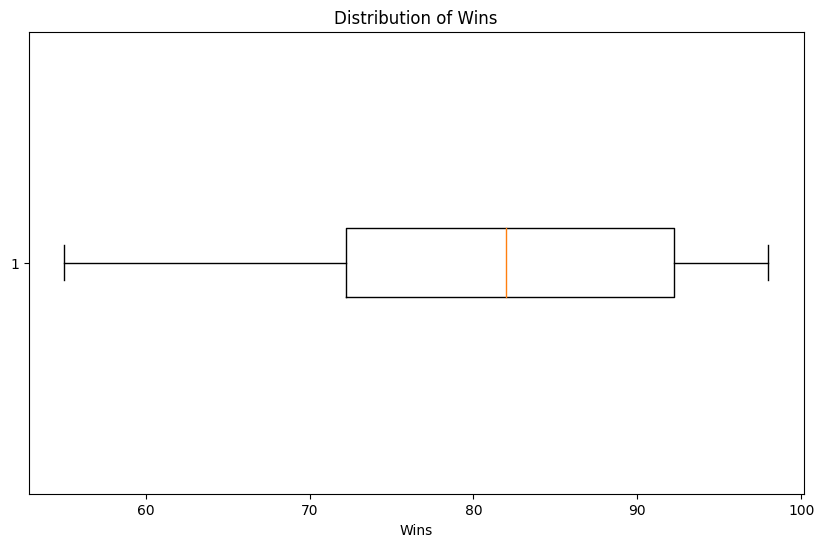

In [101]:
# Boxplot
df.columns = df.columns.str.strip('_"')
df.columns = df.columns.str.strip('"')

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Wins'], vert=False)
plt.title('Distribución de Wins')
plt.xlabel('Wins')
plt.show()

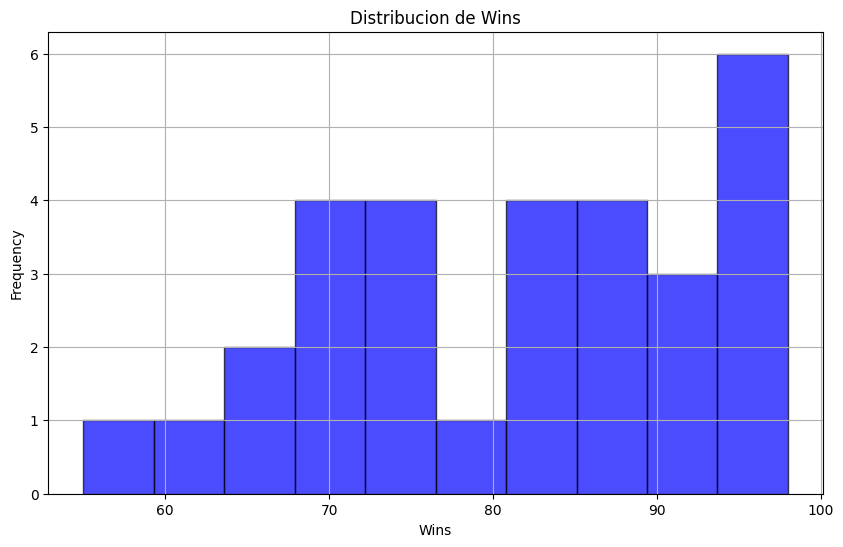

In [103]:
#Histograma
df.columns = df.columns.str.strip('_"')
df.columns = df.columns.str.strip('"')

plt.figure(figsize=(10, 6))
plt.hist(df['Wins'], bins=10, edgecolor='k', alpha=0.7, color='blue')
plt.title('Distribucion de Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

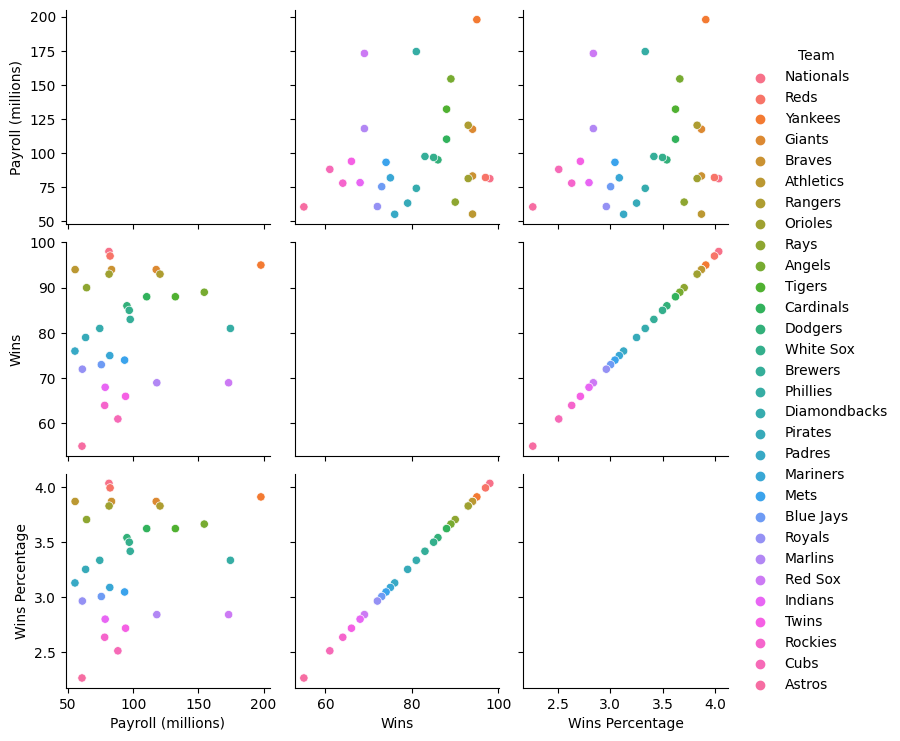

In [104]:
# Pair Plot
df.columns = df.columns.str.strip('_"')
df.columns = df.columns.str.strip('"')

# Create a pairplot
sns.pairplot(df, hue='Team', height=2.5)
plt.show()

In [114]:
# Grupos
df.columns = df.columns.str.strip('_"')
df.columns = df.columns.str.strip('"')

df['Wins Quartile'] = pd.qcut(df['Wins'], q=4, labels=False)
df['Payroll Quartile'] = pd.qcut(df['Payroll (millions)'], q=4, labels=False)


wins_quartiles = df.groupby('Wins Quartile')['Team'].unique()
payroll_quartiles = df.groupby('Payroll Quartile')['Team'].unique()

print("Teams in Wins Quartiles:")
print(wins_quartiles)

print("\nTeams in Payroll Quartiles:")
print(payroll_quartiles)

Teams in Wins Quartiles:
Wins Quartile
0    [Royals, Marlins, Red Sox, Indians, Twins, Roc...
1    [Phillies, Diamondbacks, Pirates, Padres, Mari...
2    [Rays, Angels, Tigers, Cardinals, Dodgers, Whi...
3    [Nationals, Reds, Yankees, Giants, Braves, Ath...
Name: Team, dtype: object

Teams in Payroll Quartiles:
Payroll Quartile
0    [Athletics, Rays, Diamondbacks, Pirates, Padre...
1    [Nationals, Reds, Braves, Orioles, Mariners, I...
2    [Cardinals, Dodgers, White Sox, Brewers, Mets,...
3    [Yankees, Giants, Rangers, Angels, Tigers, Phi...
Name: Team, dtype: object
